In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [35]:
data=pd.read_csv('Anomadata.csv')

In [36]:
print(data)

                time  y        x1        x2        x3          x4        x5  \
0        5 1 99 0:00  0  0.376665 -4.596435 -4.095756   13.497687 -0.118830   
1        5 1 99 0:02  0  0.475720 -4.542502 -4.018359   16.230659 -0.128733   
2        5 1 99 0:04  0  0.363848 -4.681394 -4.353147   14.127997 -0.138636   
3        5 1 99 0:06  0  0.301590 -4.758934 -4.023612   13.161566 -0.148142   
4        5 1 99 0:08  0  0.265578 -4.749928 -4.333150   15.267340 -0.155314   
...              ... ..       ...       ...       ...         ...       ...   
18393  5 28 99 23:58  0 -0.877441  0.786430  0.406426  135.301215  0.112295   
18394   5 29 99 0:00  0 -0.843988  0.633086  0.561918  133.228949  0.141332   
18395   5 29 99 0:02  0 -0.826547  0.450126  0.334582  134.977973  0.170370   
18396   5 29 99 0:04  0 -0.822843  0.419383  0.387263  135.658942  0.199422   
18397   5 29 99 0:06  0 -0.840981  0.582710  0.593416  136.339880  0.228460   

              x6        x7        x8  ...        x5

In [37]:
#Display the first few rows of the DataFrame

print(data.head())

          time  y        x1        x2        x3         x4        x5  \
0  5 1 99 0:00  0  0.376665 -4.596435 -4.095756  13.497687 -0.118830   
1  5 1 99 0:02  0  0.475720 -4.542502 -4.018359  16.230659 -0.128733   
2  5 1 99 0:04  0  0.363848 -4.681394 -4.353147  14.127997 -0.138636   
3  5 1 99 0:06  0  0.301590 -4.758934 -4.023612  13.161566 -0.148142   
4  5 1 99 0:08  0  0.265578 -4.749928 -4.333150  15.267340 -0.155314   

          x6        x7        x8  ...        x51        x52       x54  \
0 -20.669883  0.000732 -0.061114  ...  29.984624  10.091721 -4.936434   
1 -18.758079  0.000732 -0.061114  ...  29.984624  10.095871 -4.937179   
2 -17.836632  0.010803 -0.061114  ...  29.984624  10.100265 -4.937924   
3 -18.517601  0.002075 -0.061114  ...  29.984624  10.104660 -4.938669   
4 -17.505913  0.000732 -0.061114  ...  29.984624  10.109054 -4.939414   

         x55        x56       x57       x58       x59       x60  y.1  
0 -24.590146  18.515436  3.473400  0.033444  0.953219  0.

In [38]:
#Check Datatypes of each columns
print(data.dtypes)

time     object
y         int64
x1      float64
x2      float64
x3      float64
         ...   
x57     float64
x58     float64
x59     float64
x60     float64
y.1       int64
Length: 62, dtype: object


In [41]:
#converting Date column into datetime type
data['time'] = pd.to_datetime(data['time'], format='%d %m %y %H:%M')
data['time'] = data['time'].dt.strftime('%d-%m-%Y %H:%M')


In [9]:
print(data.dtypes)

time    datetime64[ns]
y                int64
x1             float64
x2             float64
x3             float64
             ...      
x57            float64
x58            float64
x59            float64
x60            float64
y.1              int64
Length: 62, dtype: object


## Performing EDA (Exploratory Data Analysis)


In [86]:
# Data quality check
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18398 entries, 0 to 18397
Data columns (total 62 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    18398 non-null  object 
 1   y       18398 non-null  int64  
 2   x1      18398 non-null  float64
 3   x2      18398 non-null  float64
 4   x3      18398 non-null  float64
 5   x4      18398 non-null  float64
 6   x5      18398 non-null  float64
 7   x6      18398 non-null  float64
 8   x7      18398 non-null  float64
 9   x8      18398 non-null  float64
 10  x9      18398 non-null  float64
 11  x10     18398 non-null  float64
 12  x11     18398 non-null  float64
 13  x12     18398 non-null  float64
 14  x13     18398 non-null  float64
 15  x14     18398 non-null  float64
 16  x15     18398 non-null  float64
 17  x16     18398 non-null  float64
 18  x17     18398 non-null  float64
 19  x18     18398 non-null  float64
 20  x19     18398 non-null  float64
 21  x20     18398 non-null  float64
 22

In [11]:
#checking for missing values
missing_values= data.isnull().sum()

print(missing_values)

time    0
y       0
x1      0
x2      0
x3      0
       ..
x57     0
x58     0
x59     0
x60     0
y.1     0
Length: 62, dtype: int64


In [13]:
#Drop rows with missing values
data.dropna(inplace=True)

In [91]:
# Treat outliers using z-score method
def treat_outliers_zscore(data, threshold=3):
    z_scores = np.abs((data - data.mean()) / data.std())
    data_filtered = data[z_scores < threshold]
    return data_filtered

In [92]:
# Visualize the data before and after treating outliers
def visualize_data(data, title):
    plt.figure(figsize=(12, 6))
    sns.histplot(data=data, kde=True)
    plt.title(title)
    plt.show()

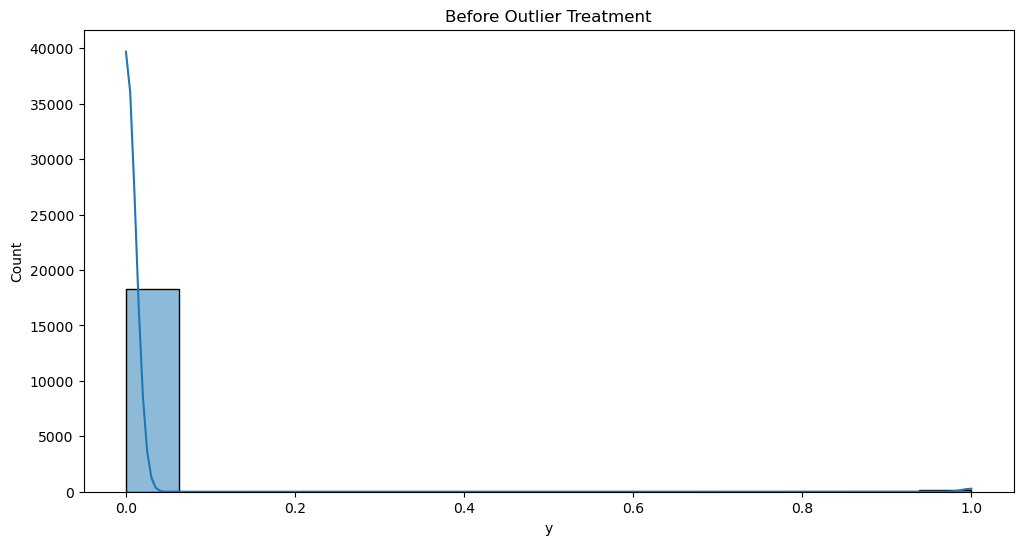

In [94]:
# Visualize the target variable before outlier treatment
visualize_data(data['y'], title='Before Outlier Treatment')

In [95]:
# Treat outliers using z-score method
data_filtered_zscore = treat_outliers_zscore(data['y'])

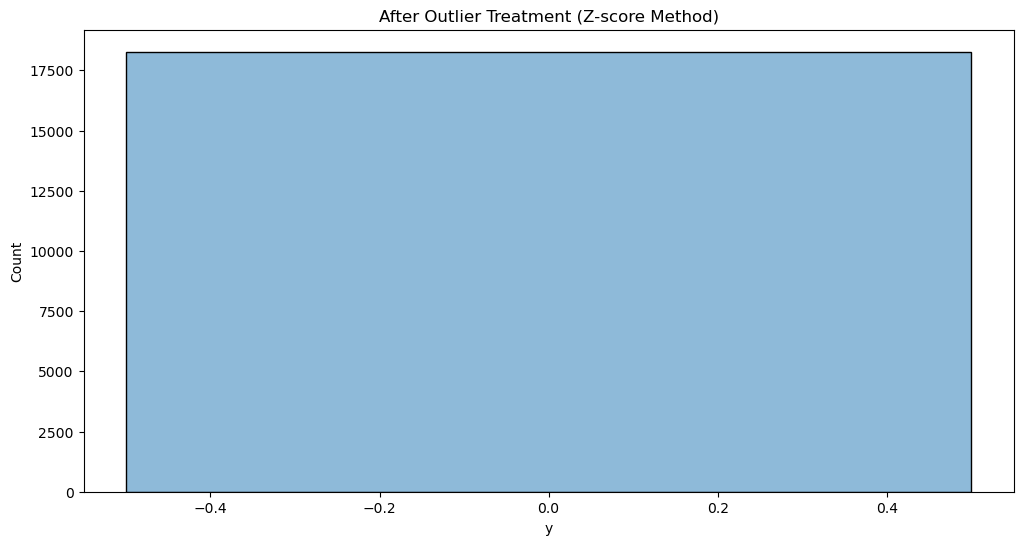

In [96]:
# Visualize the target variable after outlier treatment
visualize_data(data_filtered_zscore, title='After Outlier Treatment (Z-score Method)')

In [17]:
# Applying Standardization 
def standardize(data):
    data_std = data.copy()
    for column in data_std.columns:
        data_std[column] = (data_std[column] - data_std[column].mean()) / data_std[column].std()
    return data_std
data_scaled = standardize(data.drop('y', axis=1))


In [42]:
print(data_scaled)

           time        x1        x2        x3        x4        x5        x6  \
809   -1.725737 -1.168794 -1.870937  0.907784  1.863923 -0.390178 -0.309426   
814   -1.724913 -1.374962 -1.779728  1.011526  1.863924 -0.243974 -0.359123   
916   -1.707940 -1.451187 -0.548294  1.431607  2.212919 -0.705477  0.274697   
920   -1.707281 -1.643078 -0.705038  1.504252  2.338666 -0.830227  0.494798   
924   -1.706622 -1.544513 -0.647594  1.509732 -3.124837 -0.866287  0.705307   
...         ...       ...       ...       ...       ...       ...       ...   
18393  1.450140 -1.764491 -0.352113  0.181496  1.940117 -0.254152  0.534199   
18394  1.450305 -1.697216 -0.407866  0.220562  1.917204 -0.210721  0.516184   
18395  1.450470 -1.662146 -0.474388  0.163446  1.936543 -0.167288  0.498170   
18396  1.450634 -1.654695 -0.485565  0.176682  1.944072 -0.123834  0.480155   
18397  1.450799 -1.691170 -0.426182  0.228476  1.951601 -0.080401  0.488208   

             x7        x8        x9  ...       x51 

In [19]:
# Concatenate scaled features with target column
cleaned_data = pd.concat([data_scaled, data['y']], axis=1)

In [20]:
print(cleaned_data)

           time        x1        x2        x3        x4        x5        x6  \
809   -1.725737 -1.168794 -1.870937  0.907784  1.863923 -0.390178 -0.309426   
814   -1.724913 -1.374962 -1.779728  1.011526  1.863924 -0.243974 -0.359123   
916   -1.707940 -1.451187 -0.548294  1.431607  2.212919 -0.705477  0.274697   
920   -1.707281 -1.643078 -0.705038  1.504252  2.338666 -0.830227  0.494798   
924   -1.706622 -1.544513 -0.647594  1.509732 -3.124837 -0.866287  0.705307   
...         ...       ...       ...       ...       ...       ...       ...   
18393  1.450140 -1.764491 -0.352113  0.181496  1.940117 -0.254152  0.534199   
18394  1.450305 -1.697216 -0.407866  0.220562  1.917204 -0.210721  0.516184   
18395  1.450470 -1.662146 -0.474388  0.163446  1.936543 -0.167288  0.498170   
18396  1.450634 -1.654695 -0.485565  0.176682  1.944072 -0.123834  0.480155   
18397  1.450799 -1.691170 -0.426182  0.228476  1.951601 -0.080401  0.488208   

             x7        x8        x9  ...       x52 

## Feature Engineering

In [44]:
data=pd.read_csv('Anomadata.csv')

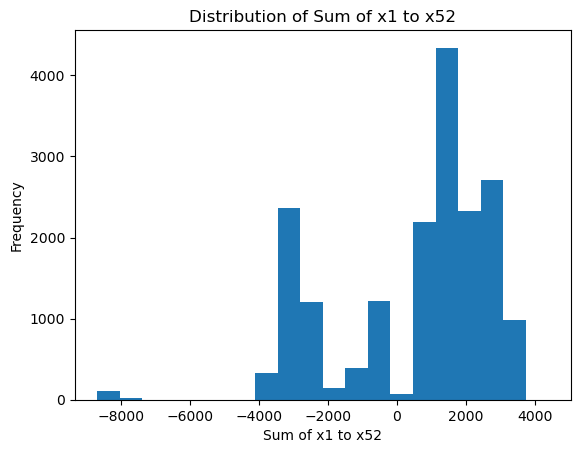

In [45]:
# Creating new features
# Aggregating features

data['sum_x'] = data.iloc[:, 2:53].sum(axis=1)    #sum of cloumns from x1 to x52 
data['sum_x'].head()

plt.hist(data['sum_x'], bins=20)  
plt.xlabel('Sum of x1 to x52')
plt.ylabel('Frequency')
plt.title('Distribution of Sum of x1 to x52')
plt.show()

In [46]:
#Sum of first 5 values
data['sum_x'].head()

0    1246.033012
1    1270.858793
2    1287.629102
3    1286.217478
4    1280.483629
Name: sum_x, dtype: float64

In [47]:
# Find the row with the highest sum value
highest_sum_row = data.loc[data['sum_x'].idxmax()]

# Find the index of the row with the highest sum value
highest_sum_index = data['sum_x'].idxmax()

# Extract the row with the highest sum value
highest_sum_row = data.loc[highest_sum_index, ['time', 'sum_x']]
print("Row with the highest sum value:")
highest_sum_row

Row with the highest sum value:


time     5 13 99 6:34
sum_x     4386.489221
Name: 8136, dtype: object

In [48]:
# Mean of x1 to x52
data['mean_x'] = data.iloc[:, 2:53].mean(axis=1)  
data['mean_x'].head()

0    24.432020
1    24.918800
2    25.247629
3    25.219951
4    25.107522
Name: mean_x, dtype: float64

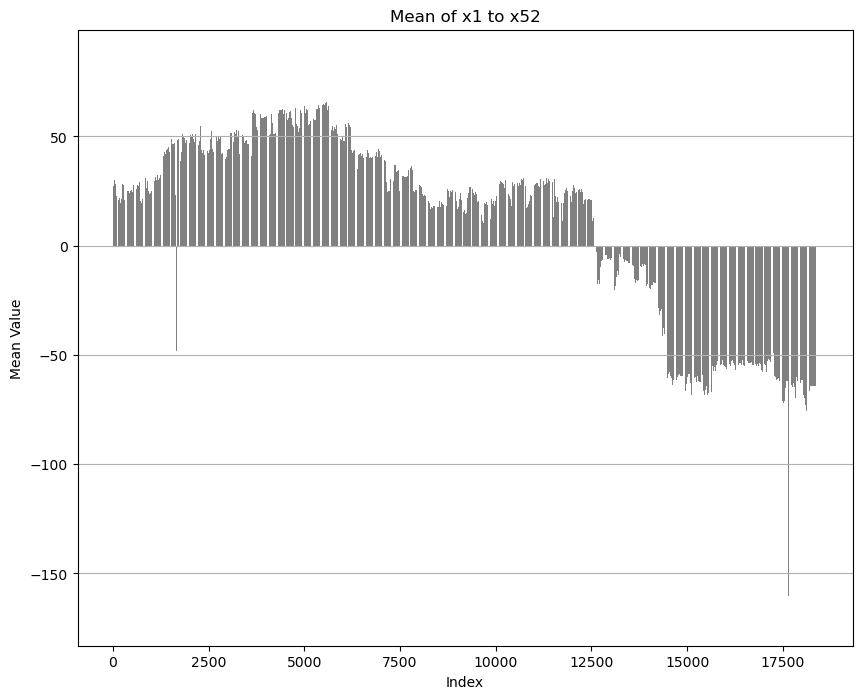

In [52]:
#ploting the [mean_x]

plt.figure(figsize=(10, 8))
plt.bar(data.index, data['mean_x'], color='grey')
plt.title('Mean of x1 to x52')
plt.xlabel('Index')
plt.ylabel('Mean Value')
plt.grid(axis='y')
plt.show()

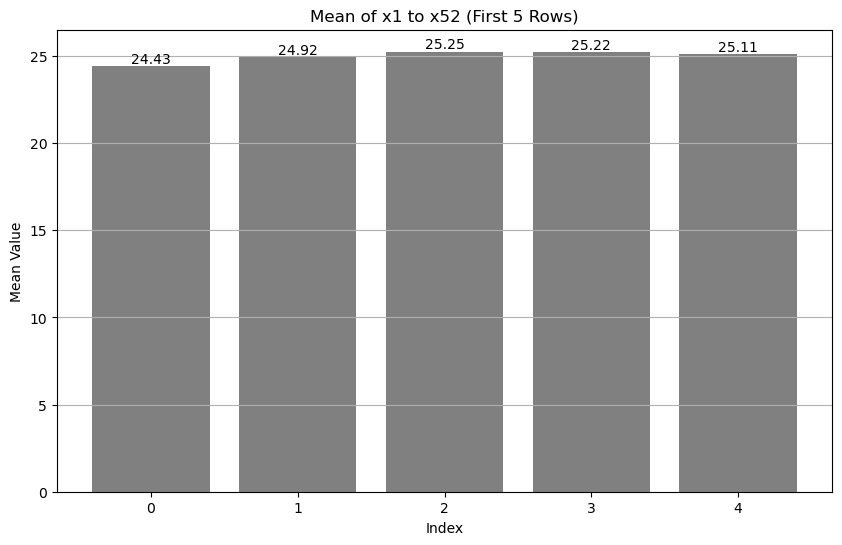

In [53]:
#ploting the first 5 [mean_x]
data_subset = data.head(5)

# Create a bar chart for mean_x data of the first 5 rows
plt.figure(figsize=(10, 6))  
bars = plt.bar(data_subset.index, data_subset['mean_x'], color='grey')

# Add value annotations on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, round(height, 2), ha='center', va='bottom')

plt.title('Mean of x1 to x52 (First 5 Rows)')
plt.xlabel('Index')
plt.ylabel('Mean Value')
plt.grid(axis='y')
plt.xticks(data_subset.index)
plt.show()

In [54]:
# Max value of x1 to x52
data['max_x'] = data.iloc[:, 2:53].max(axis=1)
data['max_x'].head()

0    1351.63286
1    1370.37895
2    1368.12309
3    1365.69145
4    1363.25786
Name: max_x, dtype: float64

In [55]:
#Feature transformation
 
data['x1_squared'] = data['x1'] ** 2
data['x1_squared'].head()

0    0.141877
1    0.226310
2    0.132386
3    0.090957
4    0.070532
Name: x1_squared, dtype: float64

In [59]:
#Date features 
# converting date and time format in a proper date and time format

data['time'] = pd.to_datetime(data['time'])
data['time'] = pd.to_datetime(data['time'], errors='coerce')

data['hour'] = data['time'].dt.hour
data['date'] = data['time'].dt.date

In [64]:
print(data[['time', 'hour', 'date']])


                     time  hour        date
0     1999-05-01 00:00:00     0  1999-05-01
1     1999-05-01 00:02:00     0  1999-05-01
2     1999-05-01 00:04:00     0  1999-05-01
3     1999-05-01 00:06:00     0  1999-05-01
4     1999-05-01 00:08:00     0  1999-05-01
...                   ...   ...         ...
18393 1999-05-28 23:58:00    23  1999-05-28
18394 1999-05-29 00:00:00     0  1999-05-29
18395 1999-05-29 00:02:00     0  1999-05-29
18396 1999-05-29 00:04:00     0  1999-05-29
18397 1999-05-29 00:06:00     0  1999-05-29

[18398 rows x 3 columns]


In [97]:

# Save the modified dataset
data.to_csv('modified_anomadata.csv', index=False)

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [66]:
data=pd.read_csv('Anomadata.csv')

In [67]:
# Split the data into features (X) and target variable (y)
X = data.drop(['time', 'y'], axis=1)  # Let 'time' is not a feature for prediction
y = data['y']

In [68]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
## Standardize the features using StandardScaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [70]:
# Define and train the logistic regression model with maximum of 1000 iterations.
logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [71]:
#Predicting on the test set and evaluate the model using various evaluation metrics including accuracy, precision, recall, F1 score, and ROC AUC score.

y_pred = logistic_regression.predict(X_test_scaled)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [72]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [73]:
print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

Model Evaluation Metrics:
Accuracy: 0.9959
Precision: 0.7333
Recall: 0.5000
F1 Score: 0.5946
ROC AUC Score: 0.7495


In [74]:
# Predicting on the validation set and evaluate the model using various evaluation metrics.
y_test_pred = logistic_regression.predict(X_test_scaled)

In [75]:
#Predicting on the test set and evaluate the model using the same evaluation metrics

accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)
roc_auc_test = roc_auc_score(y_test, y_test_pred)

In [76]:
#printing out the evaluation metrics for both the validation and test sets to assess the model's performance on unseen data. 

print("\nTest Metrics:")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1 Score: {f1_test:.4f}")
print(f"ROC AUC Score: {roc_auc_test:.4f}")


Test Metrics:
Accuracy: 0.9959
Precision: 0.7333
Recall: 0.5000
F1 Score: 0.5946
ROC AUC Score: 0.7495


In [77]:
from flask import Flask, request, jsonify
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import numpy as np
import pickle

In [78]:
data=pd.read_csv('Anomadata.csv')

In [79]:
# Split the data into features (X) and target variable (y)
X = data.drop(['time', 'y'], axis=1)  # Assuming 'time' is not a feature for prediction
y = data['y']

In [80]:
# Train a logistic regression model
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
logistic_regression = LogisticRegression(max_iter=1000)
logistic_regression.fit(X_scaled, y)

LogisticRegression(max_iter=1000)

In [81]:
# Serialize the trained model
with open('logistic_regression_model.pkl', 'wb') as f:
    pickle.dump(logistic_regression, f)

In [82]:
# Initialize Flask application
app = Flask(__name__)

In [83]:
# Load the trained model
with open('logistic_regression_model.pkl', 'rb') as f:
    model = pickle.load(f)

In [84]:
from flask import send_file

@app.route('/predict_new_one', methods=['POST'])
def predict_new_one():
    # Get input data from request
    data = request.json
    
    # Preprocess input data 
    # For example, convert input data to numpy array
    features = np.array(data['features'])
    
    # Standardize the features
    features_scaled = scaler.transform(features)
    
    # Make predictions using the loaded model
    predictions = model.predict(features_scaled)
    
    # Format predictions as JSON response
    response = {'predictions': predictions.tolist()}
    
    # Create a temporary file to store the JSON data
    temp_file = tempfile.NamedTemporaryFile(delete=False)
    with open(temp_file.name, 'w') as file:
        json.dump(response, file)
    
    # Close the temporary file
    temp_file.close()
    
    # Return the file for download
    return send_file(temp_file.name, as_attachment=True, attachment_filename='predictions.json')